<a href="https://colab.research.google.com/github/roshank1605A04/Titanic-Passenger-Survival-Prediction/blob/master/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Importing the dataset**

In [0]:
train = pd.read_csv('drive/My Drive/Projects/practice/Titanic Passenger Survival/titanic_train.csv')
test = pd.read_csv('drive/My Drive/Projects/practice/Titanic Passenger Survival/titanic_test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


**SibSp: No. of siblings/Spouses in abroad
   Parch: No. of Parents/Childrens abroad**

In [0]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
# Checking if our dataset contains any NULL values

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train['Ticket'].nunique()

681

In [0]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [0]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [0]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**Data Preprocessing**

In [0]:
train_copy = train.copy()
test_copy = test.copy()

In [0]:
# Removing unnecassary columns

train = train.drop(['PassengerId', 'Ticket'], axis = 1)


print(train.columns)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [0]:
test = test.drop(['PassengerId', 'Ticket',], axis = 1)

print(test.columns)

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [0]:
combine = [train, test]

In [0]:

train['Cabin'].fillna('U', inplace=True)
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])

test['Cabin'].fillna('U', inplace=True)
test['Cabin'] = test['Cabin'].apply(lambda x: x[0])

train['Cabin'].unique()


array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,U,S


In [0]:
for dataset in combine:
  dataset['Cabin'] = dataset['Cabin'].fillna('U')
  dataset['Cabin'] = dataset['Cabin'].apply(lambda x: x[0])
  
pd.crosstab(train['Cabin'], train['Survived'])

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
U,481,206


In [0]:
train[['Cabin', 'Survived']].groupby(['Cabin'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Cabin,Survived
7,T,0.000000
8,U,0.299854
0,A,0.466667
6,G,0.500000
2,C,0.593220
5,F,0.615385
1,B,0.744681
4,E,0.750000
3,D,0.757576


In [0]:
cabin_mapping = {"T": 0, "U": 1, "A": 2, "G": 3, "C": 4, "F": 5, "B": 6, "E": 7, "D": 8}
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    dataset['Cabin'] = dataset['Cabin'].fillna(0)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,4,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,4,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S


In [0]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [0]:


for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Sir', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Dr', 'Mr')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()



,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.161905
3,Mrs,0.793651
4,Rare,0.214286
5,the Countess,1.000000


In [0]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,4,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,4,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S,Mr


In [0]:
title_mapping = {"Mrs": 4, "Miss": 3, "Mr": 1, "Master": 2, "Rare": 0}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,4,C,4.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S,3.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,4,S,4.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S,1.0


In [0]:

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,4,C,4.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,S,3.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,4,S,4.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,S,1.0


In [0]:
# Imputing Missing Values

train['Age'].fillna(train['Age'].dropna().median(), inplace=True)
test['Age'].fillna(train['Age'].mean(), inplace = True)
test['Fare'].fillna(train['Fare'].dropna().median(), inplace = True)
train['Embarked'].fillna('C', inplace = True)
test['Embarked'].fillna('C', inplace = True)


In [0]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [0]:

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 4
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 0
    
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,1,S,1.0,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,4,C,4.0,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,1,S,3.0,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,4,S,4.0,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,1,S,1.0,"(32.252, 48.168]"


In [0]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [0]:
'''
for dataset in combine:    
    dataset.loc[ dataset['FamilySize'] > 4, 'FamilySize'] = 0  
    dataset.loc[ dataset['FamilySize'] <= 4, 'FamilySize'] = 1
    
train.head()

'''

"\nfor dataset in combine:    \n    dataset.loc[ dataset['FamilySize'] > 4, 'FamilySize'] = 0  \n    dataset.loc[ dataset['FamilySize'] <= 4, 'FamilySize'] = 1\n    \ntrain.head()\n\n"

In [0]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,1,0,1.0,"(16.336, 32.252]",2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,4,1,4.0,"(32.252, 48.168]",2
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,1,0,3.0,"(16.336, 32.252]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,4,0,4.0,"(32.252, 48.168]",2
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,1,0,1.0,"(32.252, 48.168]",1


In [0]:

train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)



,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [0]:


for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(5)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,1,0,1.0,"(16.336, 32.252]",2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,3,4,1,4.0,"(32.252, 48.168]",2
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,1,1,0,3.0,"(16.336, 32.252]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,4,0,4.0,"(32.252, 48.168]",2
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,1,1,0,1.0,"(32.252, 48.168]",1


In [0]:
train = train.drop(['AgeBand', 'Name', 'SibSp', 'Parch' ], axis = 1)
test = test.drop(['Name', 'SibSp', 'Parch'], axis = 1)

In [0]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x_train = train.drop('Survived', axis = 1)
y_train = train.Survived

print(x_train.shape)
print(y_train.shape)

(891, 8)
(891,)


In [0]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0,1,0,1.0,2
1,1,1,1,2.0,3,4,1,4.0,2
2,1,3,1,1.0,1,1,0,3.0,1
3,1,1,1,2.0,3,4,0,4.0,2
4,0,3,0,2.0,1,1,0,1.0,1


In [0]:
x_test = test

print(x_test.shape)

(418, 8)


In [0]:
'''
from sklearn.model_selection import train_test_split 

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)
'''

'\nfrom sklearn.model_selection import train_test_split \n\nx_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)\n'

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
#x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.33922101 0.2096452  0.16874812 0.11269072 0.08894929 0.05149289
 0.02183786 0.00741492]


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.33922101 0.2096452  0.16874812 0.11269072 0.08894929]


In [0]:
x_train

array([[-1.90386147, -0.16874302,  0.32791026, -0.51782161,  0.22073179],
       [ 3.00663252, -0.13171522, -1.28605086,  0.46436509, -0.04010024],
       [-0.04875718, -1.57226679, -0.77558194, -1.2972408 , -0.11996154],
       ...,
       [ 0.90242887, -1.76222116,  0.44071742, -0.8645806 ,  1.11984568],
       [ 0.21098649,  1.96279915, -1.18041621,  0.85647786,  0.48103077],
       [-2.08836924, -0.54849005, -1.36075869,  2.13493504,  0.23086413]])

**Modelling**

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Training Accuracy :', model.score(x_train, y_train))

Training Accuracy : 0.8092031425364759


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits = 5)

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = cross_validation)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.8013724086251905
Mean Standard Deviation:  0.012709974632745872


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

**AdaBoost Classifier**

In [0]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid)

Training Accuracy : 0.8406285072951739


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = StratifiedKFold(n_splits = 5))
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.7924401382090208
Mean Standard Deviation:  0.0223128948895535


**Gradient Boosting**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid)

Training Accuracy : 0.8866442199775533


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = StratifiedKFold(n_splits = 5))
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.7969032058095168
Mean Standard Deviation:  0.015879224455638417


**Decision Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid)

Training Accuracy : 0.9057239057239057


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import Strat

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.7924049483600046
Mean Standard Deviation:  0.04037263479207128


**Extra Trees Classifier**

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))

Training Accuracy:  0.9057239057239057


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.8081358529111338
Mean Standard Deviation:  0.026852840097782778


**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print('Validation Accuracy: ', model.score(x_valid, y_valid))

Training Accuracy : 0.9034792368125701


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits = 5)

param_grid = [{'max_depth': [4, 6, 8], 
                'max_features': ['sqrt', 'auto', 'log2'], 
                'n_estimators': [50, 10],
               'min_samples_split': [2, 3, 10],
               'min_samples_leaf': [1, 3, 10],
               'bootstrap': ['True', 'False']}]

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cross_validation, verbose = 1)
grid_search.fit(x_train, y_train)

print("Best Accuracy: ", grid_search.best_score_)
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Accuracy:  0.8215488215488216
Best Parameters:  {'bootstrap': 'True', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed:  1.3min finished


In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(bootstrap = 'True', max_depth = 6, max_features = 'log2', min_samples_leaf = 3, min_samples_split = 10, n_estimators = 10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print('Validation Accuracy: ', model.score(x_valid, y_valid))

Training Accuracy : 0.856341189674523


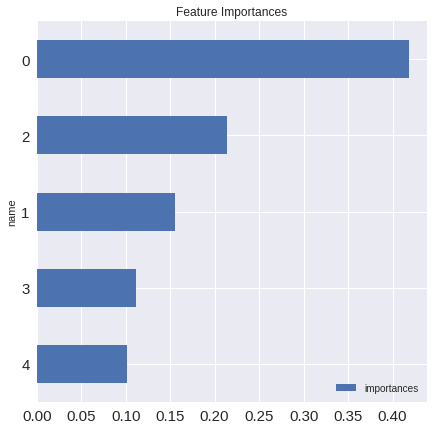

In [0]:

feature = pd.DataFrame()
x_train = pd.DataFrame(x_train)

feature['name'] = x_train.columns
feature['importances'] = model.feature_importances_

feature.sort_values(by = ['importances'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', figsize = (7, 7), title = 'Feature Importances', fontsize = 15)

In [0]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.8137282941777324
Mean Standard Deviation:  0.03157949583575602


**Xg-Boost**

In [0]:
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid))


Training Accuracy : 0.8810325476992144


In [0]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.8002457155827942
Mean Standard Deviation:  0.033149503069303025


In [0]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId': test_copy['PassengerId'],'Survived': y_pred})

#Visualize the first 5 rows
submission.head()

In [0]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

In [0]:
from google.colab import files
files.download('submission.csv')

**K nearest neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print('Validation Accuracy: ', model.score(x_valid, y_valid))

In [0]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

**Support Vector Machine**

In [0]:
from sklearn.svm import SVC

model = SVC(C = 9, gamma = 0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print('Validation Accuracy: ', model.score(x_valid, y_valid))

In [0]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

In [0]:
'''
from sklearn.model_selection import GridSearchCV

parameters =[{'C':[9, 11, 15], 'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma': [1, 1.5, 2]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 2, scoring = 'accuracy' )

grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
'''

In [0]:

'''from sklearn.svm import SVC

model = SVC(C = 13, gamma = 0.00001, kernel = 'poly')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print('Validation Accuracy: ', model.score(x_valid, y_valid))
'''

**Multi Layer Perceptron**

In [0]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid))

In [0]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

**Artificial Neural Networks**

**Importing libraries**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
'''
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu', input_dim = 8))

# second hidden layer
model.add(Dense(output_dim = 5, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 500)

'''

In [0]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':test_copy['PassengerId'],'Survived': y_pred})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv


In [0]:
from google.colab import files
files.download('submission.csv')